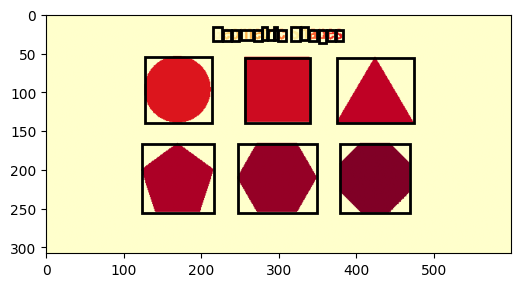

In [10]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

# Đọc ảnh và chuyển sang thang độ xám
data = Image.open('geometric.png').convert('L')
a = np.asarray(data)

# thực hiện ngưỡng hóa Otsu
thres = threshold_otsu(a)

# giữ lại các pixel có cường độ lớn hơn ngưỡng
b = a > thres

# gán nhãn trên ảnh b
c = label(b)

cl = Image.fromarray(c)
iio.imsave('label_output.png', cl)

# thực hiện regionprops trên ảnh đã gán nhãn c
properties = ['Area', 'Centroid', 'BoundingBox']
d = regionprops(c)

# lệnh sau tạo ra một hình vẽ trống kích thước 6 inch x 6 inch
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(c, cmap='YlOrRd')

for i in d:
    lr, lc, ur, uc = i['BoundingBox']
    rec_width = uc - lc
    rec_height = ur - lr

    # Vẽ các khung hình chữ nhật với gốc tại (lr, lc)
    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height, fill=False,
                              edgecolor='black', linewidth=2)
    ax.add_patch(rect)

plt.show()


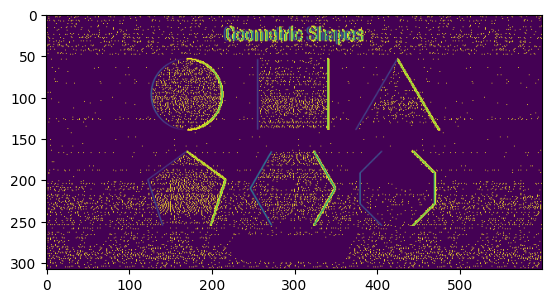

In [11]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data= Image.open('geometric.png').convert ('L')
bmg =abs(data-nd.shift(data, (0,1), order=0))
plt.imshow(bmg)
plt.show()

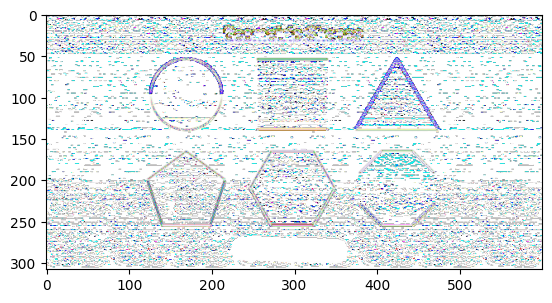

In [12]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png')
a = nd.sobel(data, axis=0)
b = nd.sobel(data, axis=1)
bmg = abs(a) + abs(b)
plt.imshow(a)
plt.show()
     


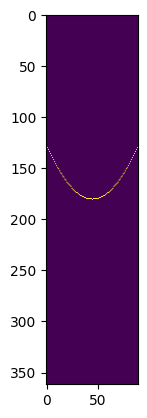

In [13]:
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def LineHough(data, gamma):
    V, H = data.shape
    R = int(np.sqrt(V * V + H * H))       # Bán kính tối đa
    ho = np.zeros((R, 90), float)         # Không gian Hough (R, góc)

    w = data.copy()
    ok = 1

    theta = np.arange(90) / 180.0 * np.pi  # Góc từ 0 đến 89 độ (chuyển sang radian)
    tp = np.arange(90).astype(float)

    while ok:
        mx = w.max()
        if mx < gamma:
            ok = 0
        else:
            v, h = divmod(w.argmax(), H)  # Tìm vị trí điểm sáng nhất
            y = V - v
            x = h

            rh = x * np.cos(theta) + y * np.sin(theta)
            for i in range(len(rh)):
                if 0 <= rh[i] < R and 0 <= tp[i] < 90:
                    ho[int(rh[i]), int(tp[i])] += mx
            w[v, h] = 0

    return ho

# Tạo dữ liệu thử nghiệm
data = np.zeros((256, 256))
data[128, 128] = 1  # Một điểm trắng tại giữa ảnh

bmg = LineHough(data, 0.5)

# Hiển thị kết quả
plt.imshow(bmg)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-49.800000000000004..255.0].


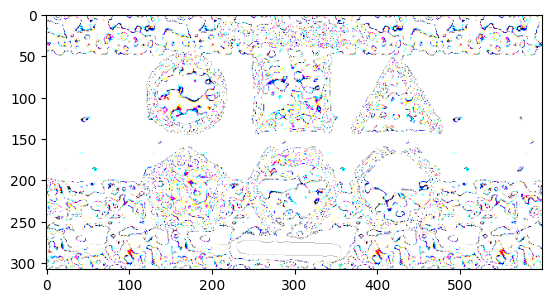

In [14]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def Harris(indata, alpha=0.2):
    # Tính đạo hàm theo x và y dùng toán tử Sobel
    x = nd.sobel(indata, 0)  # Gx
    y = nd.sobel(indata, 1)  # Gy

    # Tính bình phương đạo hàm
    x1 = x ** 2
    y1 = y ** 2
    xy = abs(x * y)  # Tích đạo hàm

    # Làm mượt với Gaussian filter
    x1 = nd.gaussian_filter(x1, 3)
    y1 = nd.gaussian_filter(y1, 3)
    xy = nd.gaussian_filter(xy, 3)

    # Tính ma trận Harris
    detC = x1 * y1 - 2 * xy
    trC = x1 + y1
    R = detC - alpha * trC**2

    return R

# Đọc ảnh từ file
data = Image.open('geometric.png')

# Gọi hàm Harris
bmg = Harris(data)

# Hiển thị ảnh kết quả
plt.imshow(bmg)
plt.show()


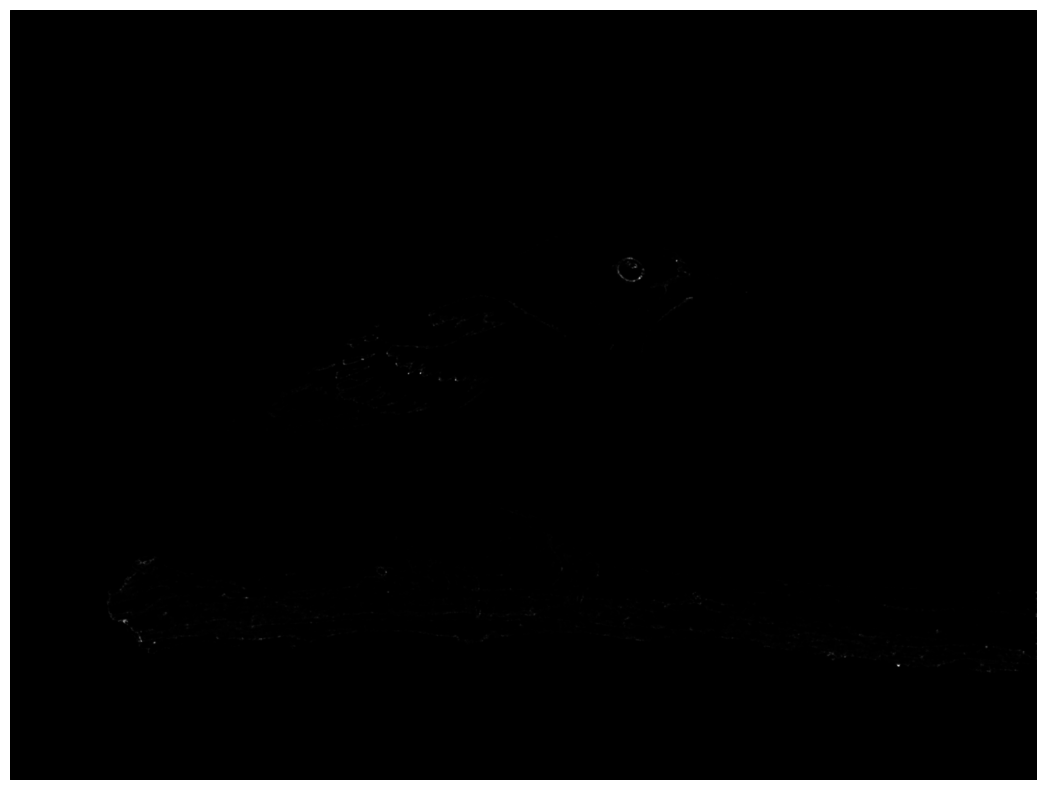

In [15]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu
from skimage.color import rgb2gray
from skimage.feature import corner_harris

# Đọc ảnh
data = iio.imread('bird.png')

# Chuyển ảnh sang ảnh xám
image_gray = rgb2gray(data)

# Áp dụng Harris Corner
coordinate = corner_harris(image_gray, k=0.001)

# Hiển thị kết quả
plt.figure(figsize=(20,10))
plt.imshow(coordinate, cmap='gray')  # nên dùng cmap='gray' cho ảnh xám
plt.axis('off')
plt.show()
